# Final Price Volatile

In [1]:
import snowflake.connector
import pandas as pd

# Short

In [2]:
# DATA GRAIN:
#expedia
#date: April 2021-March 2022
#fare_type: Economy and ECONOMY
#departure_stops =1
#duration_hrsint <=3
#Top 3 CXR: AA, UA, DW
#TOP 5 SHORT FLIGHTS
# 0	DFWORD	1644927
# 1	ORDDFW	1638829
# 2	ORDIAH	1154915
# 3	IAHORD	1125903
# 4	DFWATL	1091099
    
try:
    ctx= snowflake.connector.connect(user='CMU',
                                     password="ql2_analytics",
                                     account="zk56677",
                                     database='QL2_PROD',
                                     schema='public',
                                     warehouse='CMU_WAREHOUSE',
                                     role='SYSADMIN' )
    cursor = ctx.cursor()
    cur = cursor.execute(""" 
    WITH df1 as(
    SELECT 
         MARKET, SITE, CXR, QTS, QL2_QTS, DEPARTURE_DATE, QL2_DDATE, DEPARTURE_STOPS,FARE_TYPE, FARE, 
         FLIGHT_NUMBER, DEPARTURE_TIME, ROUTE, YEAR_MONTH, DURATION_FLIGHT,
         LEFT(DURATION_FLIGHT,CHARINDEX(':',DURATION_FLIGHT)-1) AS DURATION_HRS,
         RIGHT(DURATION_FLIGHT,CHARINDEX(':', (REVERSE(DURATION_FLIGHT))) - 1) AS DURATION_MIN,
         CAST(DURATION_HRS AS FLOAT)DURATION_HRS_FLT,
         CAST(DURATION_MIN AS FLOAT)DURATION_MIN_FLT
     FROM CAPSTONE_RAW_AIRFARE_V
    
    ),
     df2 as(
         SELECT *, EXTRACT(MONTH FROM QTS) AS MONTH, EXTRACT(YEAR FROM QTS) AS YEAR 
             FROM df1 WHERE (
                 DURATION_HRS_FLT <=3 
                 AND DEPARTURE_STOPS = 0
                 AND (FARE_TYPE = 'ECONOMY'OR FARE_TYPE = 'Economy') 
          )
     ), 
     df3 AS(
    SELECT 
         MARKET, SITE, CXR, QTS, QL2_QTS, DEPARTURE_DATE, QL2_DDATE, DEPARTURE_STOPS,FARE_TYPE, FARE, 
         FLIGHT_NUMBER, DEPARTURE_TIME, ROUTE, YEAR_MONTH, DURATION_FLIGHT, MONTH, YEAR,
        CASE WHEN DURATION_MIN_FLT >= 30 
            THEN DURATION_HRS_FLT + 1 
            ELSE DURATION_HRS_FLT END AS DURATION_HRSINT
        FROM df2
        WHERE DURATION_HRSINT <= 3 ORDER BY DURATION_HRSINT DESC
        )
    SELECT * FROM df3
        WHERE 
        (CXR = 'AA' OR CXR = 'UA' OR CXR = 'DL') 
        AND  (MARKET = 'DFWORD' 
            OR MARKET = 'ORDDFW' 
            OR MARKET = 'ORDIAH' 
            OR MARKET = 'IAHORD' 
            OR MARKET = 'DFWATL')
    ;
    
 
    """)

    df_top5short_final = cur.fetch_pandas_all()
    
except Exception as e:
    print("failed connecting to QL2_PROD",e)

/Users/yunjiao/anaconda3/lib/python3.7/site-packages/cryptography/hazmat/backends/openssl/x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,


In [3]:
df_top5short_final = df_top5short_final.dropna()

# Median

In [4]:
#Splitting the departure_date into new columns of year/month
    
# 0	ATLDEN	832415
# 1	DFWLAS	500648
# 2	EWRIAH	366561
# 3	IAHEWR	348468
# 4	LAXHNL	332463
try:
    ctx= snowflake.connector.connect(user='CMU',
                                     password="ql2_analytics",
                                     account="zk56677",
                                     database='QL2_PROD',
                                     schema='public',
                                     warehouse='CMU_WAREHOUSE',
                                     role='SYSADMIN' )
    cursor = ctx.cursor()
    cur = cursor.execute(""" 
    WITH df1 as(
    SELECT 
         MARKET, SITE, CXR, QTS, QL2_QTS, DEPARTURE_DATE, QL2_DDATE, DEPARTURE_STOPS,FARE_TYPE, FARE, 
         FLIGHT_NUMBER, DEPARTURE_TIME, ROUTE, YEAR_MONTH, DURATION_FLIGHT,
         LEFT(DURATION_FLIGHT,CHARINDEX(':',DURATION_FLIGHT)-1) AS DURATION_HRS,
         RIGHT(DURATION_FLIGHT,CHARINDEX(':', (REVERSE(DURATION_FLIGHT))) - 1) AS DURATION_MIN,
         CAST(DURATION_HRS AS FLOAT)DURATION_HRS_FLT,
         CAST(DURATION_MIN AS FLOAT)DURATION_MIN_FLT
     FROM CAPSTONE_RAW_AIRFARE_V
    
    ),
     df2 as(
         SELECT *, EXTRACT(MONTH FROM QTS) AS MONTH, EXTRACT(YEAR FROM QTS) AS YEAR 
             FROM df1 WHERE (
                 (DURATION_HRS_FLT >= 3 AND DURATION_HRS_FLT <=6)
                 AND DEPARTURE_STOPS = 0
                 AND (FARE_TYPE = 'ECONOMY'OR FARE_TYPE = 'Economy') 
          )
     ), 
     df3 AS(
    SELECT 
         MARKET, SITE, CXR, QTS, QL2_QTS, DEPARTURE_DATE, QL2_DDATE, DEPARTURE_STOPS,FARE_TYPE, FARE, 
         FLIGHT_NUMBER, DEPARTURE_TIME, ROUTE, YEAR_MONTH, DURATION_FLIGHT, MONTH, YEAR,
        CASE WHEN DURATION_MIN_FLT >= 30 
            THEN DURATION_HRS_FLT + 1 
            ELSE DURATION_HRS_FLT END AS DURATION_HRSINT
        FROM df2
        WHERE (DURATION_HRSINT >= 3 AND DURATION_HRSINT <=6) ORDER BY DURATION_HRSINT DESC
        )
    SELECT * FROM df3
        WHERE 
        (CXR = 'AA' OR CXR = 'UA' OR CXR = 'DL') 
        AND  (MARKET = 'ATLDEN' 
            OR MARKET = 'DFWLAS' 
            OR MARKET = 'EWRIAH' 
            OR MARKET = 'IAHEWR' 
            OR MARKET = 'LAXHNL')
 
      ;
 
    """)

    df_top5med_final = cur.fetch_pandas_all()
    
except Exception as e:
    print("failed connecting to QL2_PROD",e)
    

In [5]:
df_top5med_final = df_top5med_final.dropna()

# Long

In [6]:
#Splitting the departure_date into new columns of year/month
# 0	EZEMIA	25349
# 1	JFKSFO	25128
# 2	MIAEZE	23597
# 3	LHRJFK	14548
# 4	MIAGRU	14450

try:
    ctx= snowflake.connector.connect(user='CMU',
                                     password="ql2_analytics",
                                     account="zk56677",
                                     database='QL2_PROD',
                                     schema='public',
                                     warehouse='CMU_WAREHOUSE',
                                     role='SYSADMIN' )
    cursor = ctx.cursor()
    cur = cursor.execute(""" 
         WITH df1 as(
    SELECT 
         MARKET, SITE, CXR, QTS, QL2_QTS, DEPARTURE_DATE, QL2_DDATE, DEPARTURE_STOPS,FARE_TYPE, FARE, 
         FLIGHT_NUMBER, DEPARTURE_TIME, ROUTE, YEAR_MONTH, DURATION_FLIGHT,
         LEFT(DURATION_FLIGHT,CHARINDEX(':',DURATION_FLIGHT)-1) AS DURATION_HRS,
         RIGHT(DURATION_FLIGHT,CHARINDEX(':', (REVERSE(DURATION_FLIGHT))) - 1) AS DURATION_MIN,
         CAST(DURATION_HRS AS FLOAT)DURATION_HRS_FLT,
         CAST(DURATION_MIN AS FLOAT)DURATION_MIN_FLT
     FROM CAPSTONE_RAW_AIRFARE_V
    
    ),
     df2 as(
         SELECT *, EXTRACT(MONTH FROM QTS) AS MONTH, EXTRACT(YEAR FROM QTS) AS YEAR 
             FROM df1 WHERE (
                 DURATION_HRS_FLT >=5 
                 AND DEPARTURE_STOPS = 0
                 AND (FARE_TYPE = 'ECONOMY'OR FARE_TYPE = 'Economy') 
          )
     ), 
     df3 AS(
    SELECT 
         MARKET, SITE, CXR, QTS, QL2_QTS, DEPARTURE_DATE, QL2_DDATE, DEPARTURE_STOPS,FARE_TYPE, FARE, 
         FLIGHT_NUMBER, DEPARTURE_TIME, ROUTE, YEAR_MONTH, DURATION_FLIGHT, MONTH, YEAR,
        CASE WHEN DURATION_MIN_FLT >= 30 
            THEN DURATION_HRS_FLT + 1 
            ELSE DURATION_HRS_FLT END AS DURATION_HRSINT
        FROM df2
        WHERE DURATION_HRSINT >6 ORDER BY DURATION_HRSINT DESC
        )
        
        SELECT * FROM df3
         WHERE 
         (CXR = 'AA' OR CXR = 'UA' OR CXR = 'DL') 
            AND  (MARKET = 'EZEMIA' 
             OR MARKET = 'JFKSFO' 
             OR MARKET = 'MIAEZE' 
             OR MARKET = 'LHRJFK' 
             OR MARKET = 'MIAGRU')

     
      ;
 
    """)

    df_top5long_final = cur.fetch_pandas_all()
    
except Exception as e:
    print("failed connecting to QL2_PROD",e)

In [7]:
df_top5long_final = df_top5long_final.dropna()

Combining all 3 dataset¶

In [8]:
#Combining short, med, long haul dfs together
short_med = pd.concat([df_top5short_final, df_top5med_final], axis=0)
df_all = pd.concat([short_med, df_top5long_final], axis=0)

In [9]:
df_all['HAUL_TYPE'] = df_all['DURATION_HRSINT'].apply(lambda x: 'short'if x <= 3 else ('medium' if (x >3 and x <=6) else 'long'))

In [10]:
df_all

MARKET SITE CXR                 QTS  QL2_QTS DEPARTURE_DATE  QL2_DDATE  \
0     IAHORD  EXP  UA 2021-12-01 04:21:00     7274     2021-12-26       7299   
1     ORDDFW  EXP  UA 2021-12-01 04:21:00     7274     2021-12-13       7286   
2     ORDDFW  EXP  AA 2021-12-01 04:21:00     7274     2021-12-13       7286   
3     IAHORD  EXP  AA 2021-12-01 04:21:00     7274     2021-12-28       7301   
4     IAHORD  EXP  UA 2021-12-01 04:21:00     7274     2021-12-28       7301   
...      ...  ...  ..                 ...      ...            ...        ...   
2879  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-09-07       7189   
2880  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-08-27       7178   
2881  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-08-28       7179   
2882  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-08-28       7179   
2883  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-10-15       7227   

      DEPARTURE_STOPS FARE_TYPE    FARE FLIGHT_NUMBER DEPARTURE_TIME  \
0                   0   ECONOMY  268.40           718          16:50   
1                   0   ECONOMY  318.40          4664          09:10   
2                   0   ECONOMY  460.40          2428          08:50   
3                   0   ECONOMY  128.40          1224          06:53   
4                   0   ECONOMY  167.41          2653          05:20   
...               ...       ...     ...           ...            ...   
2879                0   ECONOMY  329.21           314          21:01   
2880                0   ECONOMY  272.40           311          15:59   
2881                0   ECONOMY  238.67           311          16:05   
2882                0   ECONOMY  238.67           314          20:59   
2883                0   ECONOMY  198.40           321          11:45   

                           ROUTE    YEAR_MONTH DURATION_FLIGHT  MONTH  YEAR  \
0     16:50 - IAH :: 19:30 - ORD  IAHORD202112            2:40     12  2021   
1     09:10 - ORD :: 12:04 - DFW  ORDDFW202112            2:54     12  2021   
2     08:50 - ORD :: 11:24 - DFW  ORDDFW202112            2:34     12  2021   
3     06:53 - IAH :: 09:35 - ORD  IAHORD202112            2:42     12  2021   
4     05:20 - IAH :: 07:57 - ORD  IAHORD202112            2:37     12  2021   
...                          ...           ...             ...    ...   ...   
2879  21:01 - JFK :: 00:34 - SFO   JFKSFO20219            6:33      8  2021   
2880  15:59 - JFK :: 20:00 - SFO   JFKSFO20218             7:1      8  2021   
2881  16:05 - JFK :: 20:06 - SFO   JFKSFO20218             7:1      8  2021   
2882  20:59 - JFK :: 00:56 - SFO   JFKSFO20218            6:57      8  2021   
2883  11:45 - JFK :: 15:29 - SFO  JFKSFO202110            6:44      8  2021   

      DURATION_HRSINT HAUL_TYPE  
0                 3.0     short  
1                 3.0     short  
2                 3.0     short  
3                 3.0     short  
4                 3.0     short  
...               ...       ...  
2879              7.0      long  
2880              7.0      long  
2881              7.0      long  
2882              7.0      long  
2883              7.0      long  

[10906761 rows x 19 columns]

In [11]:
a = df_all

In [12]:
import time
import datetime as dt

# transforming type of DATE and QTS
a['tDATE'] = pd.to_datetime(a['DEPARTURE_DATE'])
a['tqts'] = pd.to_datetime(a['QTS'])
# calculating time till Departure
a['re'] = a['tDATE'] - a['tqts']
a

MARKET SITE CXR                 QTS  QL2_QTS DEPARTURE_DATE  QL2_DDATE  \
0     IAHORD  EXP  UA 2021-12-01 04:21:00     7274     2021-12-26       7299   
1     ORDDFW  EXP  UA 2021-12-01 04:21:00     7274     2021-12-13       7286   
2     ORDDFW  EXP  AA 2021-12-01 04:21:00     7274     2021-12-13       7286   
3     IAHORD  EXP  AA 2021-12-01 04:21:00     7274     2021-12-28       7301   
4     IAHORD  EXP  UA 2021-12-01 04:21:00     7274     2021-12-28       7301   
...      ...  ...  ..                 ...      ...            ...        ...   
2879  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-09-07       7189   
2880  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-08-27       7178   
2881  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-08-28       7179   
2882  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-08-28       7179   
2883  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-10-15       7227   

      DEPARTURE_STOPS FARE_TYPE    FARE  ...                       ROUTE  \
0                   0   ECONOMY  268.40  ...  16:50 - IAH :: 19:30 - ORD   
1                   0   ECONOMY  318.40  ...  09:10 - ORD :: 12:04 - DFW   
2                   0   ECONOMY  460.40  ...  08:50 - ORD :: 11:24 - DFW   
3                   0   ECONOMY  128.40  ...  06:53 - IAH :: 09:35 - ORD   
4                   0   ECONOMY  167.41  ...  05:20 - IAH :: 07:57 - ORD   
...               ...       ...     ...  ...                         ...   
2879                0   ECONOMY  329.21  ...  21:01 - JFK :: 00:34 - SFO   
2880                0   ECONOMY  272.40  ...  15:59 - JFK :: 20:00 - SFO   
2881                0   ECONOMY  238.67  ...  16:05 - JFK :: 20:06 - SFO   
2882                0   ECONOMY  238.67  ...  20:59 - JFK :: 00:56 - SFO   
2883                0   ECONOMY  198.40  ...  11:45 - JFK :: 15:29 - SFO   

        YEAR_MONTH DURATION_FLIGHT MONTH  YEAR  DURATION_HRSINT  HAUL_TYPE  \
0     IAHORD202112            2:40    12  2021              3.0      short   
1     ORDDFW202112            2:54    12  2021              3.0      short   
2     ORDDFW202112            2:34    12  2021              3.0      short   
3     IAHORD202112            2:42    12  2021              3.0      short   
4     IAHORD202112            2:37    12  2021              3.0      short   
...            ...             ...   ...   ...              ...        ...   
2879   JFKSFO20219            6:33     8  2021              7.0       long   
2880   JFKSFO20218             7:1     8  2021              7.0       long   
2881   JFKSFO20218             7:1     8  2021              7.0       long   
2882   JFKSFO20218            6:57     8  2021              7.0       long   
2883  JFKSFO202110            6:44     8  2021              7.0       long   

          tDATE                tqts               re  
0    2021-12-26 2021-12-01 04:21:00 24 days 19:39:00  
1    2021-12-13 2021-12-01 04:21:00 11 days 19:39:00  
2    2021-12-13 2021-12-01 04:21:00 11 days 19:39:00  
3    2021-12-28 2021-12-01 04:21:00 26 days 19:39:00  
4    2021-12-28 2021-12-01 04:21:00 26 days 19:39:00  
...         ...                 ...              ...  
2879 2021-09-07 2021-08-03 09:17:00 34 days 14:43:00  
2880 2021-08-27 2021-08-03 09:17:00 23 days 14:43:00  
2881 2021-08-28 2021-08-03 09:17:00 24 days 14:43:00  
2882 2021-08-28 2021-08-03 09:17:00 24 days 14:43:00  
2883 2021-10-15 2021-08-03 09:17:00 72 days 14:43:00  

[10906761 rows x 22 columns]

In [13]:
# calculate days till departure
a['DaysTillDeparture'] = a['re'].dt.components.days

/Users/yunjiao/anaconda3/lib/python3.7/site-packages/cryptography/hazmat/backends/openssl/x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,


In [14]:
a

MARKET SITE CXR                 QTS  QL2_QTS DEPARTURE_DATE  QL2_DDATE  \
0     IAHORD  EXP  UA 2021-12-01 04:21:00     7274     2021-12-26       7299   
1     ORDDFW  EXP  UA 2021-12-01 04:21:00     7274     2021-12-13       7286   
2     ORDDFW  EXP  AA 2021-12-01 04:21:00     7274     2021-12-13       7286   
3     IAHORD  EXP  AA 2021-12-01 04:21:00     7274     2021-12-28       7301   
4     IAHORD  EXP  UA 2021-12-01 04:21:00     7274     2021-12-28       7301   
...      ...  ...  ..                 ...      ...            ...        ...   
2879  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-09-07       7189   
2880  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-08-27       7178   
2881  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-08-28       7179   
2882  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-08-28       7179   
2883  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-10-15       7227   

      DEPARTURE_STOPS FARE_TYPE    FARE  ...    YEAR_MONTH DURATION_FLIGHT  \
0                   0   ECONOMY  268.40  ...  IAHORD202112            2:40   
1                   0   ECONOMY  318.40  ...  ORDDFW202112            2:54   
2                   0   ECONOMY  460.40  ...  ORDDFW202112            2:34   
3                   0   ECONOMY  128.40  ...  IAHORD202112            2:42   
4                   0   ECONOMY  167.41  ...  IAHORD202112            2:37   
...               ...       ...     ...  ...           ...             ...   
2879                0   ECONOMY  329.21  ...   JFKSFO20219            6:33   
2880                0   ECONOMY  272.40  ...   JFKSFO20218             7:1   
2881                0   ECONOMY  238.67  ...   JFKSFO20218             7:1   
2882                0   ECONOMY  238.67  ...   JFKSFO20218            6:57   
2883                0   ECONOMY  198.40  ...  JFKSFO202110            6:44   

     MONTH  YEAR DURATION_HRSINT  HAUL_TYPE      tDATE                tqts  \
0       12  2021             3.0      short 2021-12-26 2021-12-01 04:21:00   
1       12  2021             3.0      short 2021-12-13 2021-12-01 04:21:00   
2       12  2021             3.0      short 2021-12-13 2021-12-01 04:21:00   
3       12  2021             3.0      short 2021-12-28 2021-12-01 04:21:00   
4       12  2021             3.0      short 2021-12-28 2021-12-01 04:21:00   
...    ...   ...             ...        ...        ...                 ...   
2879     8  2021             7.0       long 2021-09-07 2021-08-03 09:17:00   
2880     8  2021             7.0       long 2021-08-27 2021-08-03 09:17:00   
2881     8  2021             7.0       long 2021-08-28 2021-08-03 09:17:00   
2882     8  2021             7.0       long 2021-08-28 2021-08-03 09:17:00   
2883     8  2021             7.0       long 2021-10-15 2021-08-03 09:17:00   

                   re DaysTillDeparture  
0    24 days 19:39:00                24  
1    11 days 19:39:00                11  
2    11 days 19:39:00                11  
3    26 days 19:39:00                26  
4    26 days 19:39:00                26  
...               ...               ...  
2879 34 days 14:43:00                34  
2880 23 days 14:43:00                23  
2881 24 days 14:43:00                24  
2882 24 days 14:43:00                24  
2883 72 days 14:43:00                72  

[10906761 rows x 23 columns]

In [15]:
##do short first
Short=a[a['HAUL_TYPE']=='short']
Short

MARKET SITE CXR                 QTS  QL2_QTS DEPARTURE_DATE  \
0       IAHORD  EXP  UA 2021-12-01 04:21:00     7274     2021-12-26   
1       ORDDFW  EXP  UA 2021-12-01 04:21:00     7274     2021-12-13   
2       ORDDFW  EXP  AA 2021-12-01 04:21:00     7274     2021-12-13   
3       IAHORD  EXP  AA 2021-12-01 04:21:00     7274     2021-12-28   
4       IAHORD  EXP  UA 2021-12-01 04:21:00     7274     2021-12-28   
...        ...  ...  ..                 ...      ...            ...   
149781  DFWLAS  EXP  AA 2021-12-26 18:08:00     7299     2022-01-01   
149782  DFWLAS  EXP  AA 2021-12-26 18:08:00     7299     2022-01-01   
149783  DFWLAS  EXP  AA 2021-12-26 18:08:00     7299     2022-01-26   
149784  DFWLAS  EXP  AA 2021-12-26 18:08:00     7299     2022-01-26   
149785  DFWLAS  EXP  AA 2021-12-26 18:08:00     7299     2022-01-26   

        QL2_DDATE  DEPARTURE_STOPS FARE_TYPE    FARE  ...    YEAR_MONTH  \
0            7299                0   ECONOMY  268.40  ...  IAHORD202112   
1            7286                0   ECONOMY  318.40  ...  ORDDFW202112   
2            7286                0   ECONOMY  460.40  ...  ORDDFW202112   
3            7301                0   ECONOMY  128.40  ...  IAHORD202112   
4            7301                0   ECONOMY  167.41  ...  IAHORD202112   
...           ...              ...       ...     ...  ...           ...   
149781       7305                0   ECONOMY  280.40  ...   DFWLAS20221   
149782       7305                0   ECONOMY  280.40  ...   DFWLAS20221   
149783       7330                0   ECONOMY   68.40  ...   DFWLAS20221   
149784       7330                0   ECONOMY   68.40  ...   DFWLAS20221   
149785       7330                0   ECONOMY   68.40  ...   DFWLAS20221   

       DURATION_FLIGHT MONTH  YEAR DURATION_HRSINT  HAUL_TYPE      tDATE  \
0                 2:40    12  2021             3.0      short 2021-12-26   
1                 2:54    12  2021             3.0      short 2021-12-13   
2                 2:34    12  2021             3.0      short 2021-12-13   
3                 2:42    12  2021             3.0      short 2021-12-28   
4                 2:37    12  2021             3.0      short 2021-12-28   
...                ...   ...   ...             ...        ...        ...   
149781            3:03    12  2021             3.0      short 2022-01-01   
149782            3:04    12  2021             3.0      short 2022-01-01   
149783            3:01    12  2021             3.0      short 2022-01-26   
149784            3:04    12  2021             3.0      short 2022-01-26   
149785            3:01    12  2021             3.0      short 2022-01-26   

                      tqts               re DaysTillDeparture  
0      2021-12-01 04:21:00 24 days 19:39:00                24  
1      2021-12-01 04:21:00 11 days 19:39:00                11  
2      2021-12-01 04:21:00 11 days 19:39:00                11  
3      2021-12-01 04:21:00 26 days 19:39:00                26  
4      2021-12-01 04:21:00 26 days 19:39:00                26  
...                    ...              ...               ...  
149781 2021-12-26 18:08:00  5 days 05:52:00                 5  
149782 2021-12-26 18:08:00  5 days 05:52:00                 5  
149783 2021-12-26 18:08:00 30 days 05:52:00                30  
149784 2021-12-26 18:08:00 30 days 05:52:00                30  
149785 2021-12-26 18:08:00 30 days 05:52:00                30  

[9552631 rows x 23 columns]

In [16]:
#fixing all of the -1 values for the DaysTillDeparture
a.loc[(a["DaysTillDeparture"] == -1), "DaysTillDeparture" ] = 0

In [17]:
pd.options.display.max_rows = 4000

In [18]:
#see the distribution of daystilldeparture values
dtd_distr = a['DaysTillDeparture'].value_counts()
df_dtd_distr = pd.DataFrame(dtd_distr)
df_dtd_distr.index.name = 'numdays_beforedep'

print(df_dtd_distr.sort_values('numdays_beforedep'))

                   DaysTillDeparture
numdays_beforedep                   
0                             534674
1                             376029
2                             345388
3                             342127
4                             343773
5                             340294
6                             339593
7                             332833
8                             333028
9                             336808
10                            334773
11                            335695
12                            338886
13                            347690
14                            340292
15                            339554
16                            341353
17                            342272
18                            341243
19                            340017
20                            338498
21                            331126
22                            329636
23                            330628
24                            330637
2

In [19]:
# a['DaysTillDeparture'] = a['DaysTillDeparture'].apply(lambda x: '1month'if x <= 30 else ('2-4month' if (x > 30 and x <=119) else '4+month'))

In [20]:
# a.loc[a['DaysTillDeparture'] == "4+month"]

In [21]:
# cast all string entry in FARE_TYPE column to lower case
# a['FARE_TYPE'] = a['FARE_TYPE'].apply(lambda x: str.lower(x))

In [22]:
# clean the data/type of DURATION

# first convert to string
# def convert_to_string (x):
#     string = str(x).split('\n')[0].split(' ')[-1] + ':00'
#     return string
# a['DURATION_FLIGHT'] = a['DURATION_FLIGHT'].apply(convert_to_string)
# a['DURATION_FLIGHT']

In [23]:
a

MARKET SITE CXR                 QTS  QL2_QTS DEPARTURE_DATE  QL2_DDATE  \
0     IAHORD  EXP  UA 2021-12-01 04:21:00     7274     2021-12-26       7299   
1     ORDDFW  EXP  UA 2021-12-01 04:21:00     7274     2021-12-13       7286   
2     ORDDFW  EXP  AA 2021-12-01 04:21:00     7274     2021-12-13       7286   
3     IAHORD  EXP  AA 2021-12-01 04:21:00     7274     2021-12-28       7301   
4     IAHORD  EXP  UA 2021-12-01 04:21:00     7274     2021-12-28       7301   
...      ...  ...  ..                 ...      ...            ...        ...   
2879  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-09-07       7189   
2880  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-08-27       7178   
2881  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-08-28       7179   
2882  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-08-28       7179   
2883  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-10-15       7227   

      DEPARTURE_STOPS FARE_TYPE    FARE  ...    YEAR_MONTH DURATION_FLIGHT  \
0                   0   ECONOMY  268.40  ...  IAHORD202112            2:40   
1                   0   ECONOMY  318.40  ...  ORDDFW202112            2:54   
2                   0   ECONOMY  460.40  ...  ORDDFW202112            2:34   
3                   0   ECONOMY  128.40  ...  IAHORD202112            2:42   
4                   0   ECONOMY  167.41  ...  IAHORD202112            2:37   
...               ...       ...     ...  ...           ...             ...   
2879                0   ECONOMY  329.21  ...   JFKSFO20219            6:33   
2880                0   ECONOMY  272.40  ...   JFKSFO20218             7:1   
2881                0   ECONOMY  238.67  ...   JFKSFO20218             7:1   
2882                0   ECONOMY  238.67  ...   JFKSFO20218            6:57   
2883                0   ECONOMY  198.40  ...  JFKSFO202110            6:44   

     MONTH  YEAR DURATION_HRSINT  HAUL_TYPE      tDATE                tqts  \
0       12  2021             3.0      short 2021-12-26 2021-12-01 04:21:00   
1       12  2021             3.0      short 2021-12-13 2021-12-01 04:21:00   
2       12  2021             3.0      short 2021-12-13 2021-12-01 04:21:00   
3       12  2021             3.0      short 2021-12-28 2021-12-01 04:21:00   
4       12  2021             3.0      short 2021-12-28 2021-12-01 04:21:00   
...    ...   ...             ...        ...        ...                 ...   
2879     8  2021             7.0       long 2021-09-07 2021-08-03 09:17:00   
2880     8  2021             7.0       long 2021-08-27 2021-08-03 09:17:00   
2881     8  2021             7.0       long 2021-08-28 2021-08-03 09:17:00   
2882     8  2021             7.0       long 2021-08-28 2021-08-03 09:17:00   
2883     8  2021             7.0       long 2021-10-15 2021-08-03 09:17:00   

                   re DaysTillDeparture  
0    24 days 19:39:00                24  
1    11 days 19:39:00                11  
2    11 days 19:39:00                11  
3    26 days 19:39:00                26  
4    26 days 19:39:00                26  
...               ...               ...  
2879 34 days 14:43:00                34  
2880 23 days 14:43:00                23  
2881 24 days 14:43:00                24  
2882 24 days 14:43:00                24  
2883 72 days 14:43:00                72  

[10906761 rows x 23 columns]

In [24]:
a.head()

MARKET SITE CXR                 QTS  QL2_QTS DEPARTURE_DATE  QL2_DDATE  \
0  IAHORD  EXP  UA 2021-12-01 04:21:00     7274     2021-12-26       7299   
1  ORDDFW  EXP  UA 2021-12-01 04:21:00     7274     2021-12-13       7286   
2  ORDDFW  EXP  AA 2021-12-01 04:21:00     7274     2021-12-13       7286   
3  IAHORD  EXP  AA 2021-12-01 04:21:00     7274     2021-12-28       7301   
4  IAHORD  EXP  UA 2021-12-01 04:21:00     7274     2021-12-28       7301   

   DEPARTURE_STOPS FARE_TYPE    FARE  ...    YEAR_MONTH DURATION_FLIGHT MONTH  \
0                0   ECONOMY  268.40  ...  IAHORD202112            2:40    12   
1                0   ECONOMY  318.40  ...  ORDDFW202112            2:54    12   
2                0   ECONOMY  460.40  ...  ORDDFW202112            2:34    12   
3                0   ECONOMY  128.40  ...  IAHORD202112            2:42    12   
4                0   ECONOMY  167.41  ...  IAHORD202112            2:37    12   

   YEAR DURATION_HRSINT  HAUL_TYPE      tDATE                tqts  \
0  2021             3.0      short 2021-12-26 2021-12-01 04:21:00   
1  2021             3.0      short 2021-12-13 2021-12-01 04:21:00   
2  2021             3.0      short 2021-12-13 2021-12-01 04:21:00   
3  2021             3.0      short 2021-12-28 2021-12-01 04:21:00   
4  2021             3.0      short 2021-12-28 2021-12-01 04:21:00   

                re DaysTillDeparture  
0 24 days 19:39:00                24  
1 11 days 19:39:00                11  
2 11 days 19:39:00                11  
3 26 days 19:39:00                26  
4 26 days 19:39:00                26  

[5 rows x 23 columns]

In [25]:
import numpy as np
np.set_printoptions(threshold=np.inf)

In [26]:
a.groupby(["DaysTillDeparture","CXR","MARKET"]).agg([np.mean,np.std])

QL2_QTS                QL2_DDATE  \
                                     mean         std         mean   
DaysTillDeparture CXR MARKET                                         
0                 AA  DFWATL  7323.096205   63.946779  7323.811322   
                      DFWLAS  7300.465029   45.867550  7301.187497   
                      DFWORD  7320.396878   66.285235  7321.107262   
                      EZEMIA  7201.056604  215.108666  7201.896226   
                      IAHORD  7317.707266   63.637113  7318.462111   
                      JFKSFO  7280.750799   92.167778  7281.421725   
                      LAXHNL  7244.539130  119.449193  7245.117391   
                      LHRJFK  7264.802469   65.264473  7265.765432   
                      MIAEZE  7354.692982   36.152547  7355.692982   
                      MIAGRU  7315.781818   23.160224  7316.781818   
                      ORDDFW  7325.536882   60.481493  7326.237352   
                      ORDIAH  7322.653836   61.820977  7323.378378   
                  DL  ATLDEN  7324.426970   78.601867  7325.109917   
                      DFWATL  7326.133452   62.544203  7326.828086   
                      EZEMIA  7129.016216  208.310405  7129.697297   
                      JFKSFO  7297.538642   91.731468  7298.117096   
                      LAXHNL  7296.328205  114.021182  7297.087179   
                      LHRJFK  7367.991202   56.114457  7368.967742   
                      MIAEZE  7357.362069   67.980879  7358.339080   
                      MIAGRU  7365.000000   35.422281  7366.000000   
                  UA  ATLDEN  7326.241332   69.412309  7326.934380   
                      DFWORD  7320.713276   78.163978  7321.410614   
                      EWRIAH  7330.464364   62.764863  7331.164250   
                      IAHEWR  7331.932741   52.414563  7332.620125   
                      IAHORD  7314.349519   83.572637  7315.054379   
                      JFKSFO  7293.485714   28.857022  7294.342857   
                      LAXHNL  7275.269962  128.130567  7276.007605   
                      ORDDFW  7323.855087   71.285226  7324.539574   
                      ORDIAH  7323.353079   73.071733  7324.053051   
1                 AA  DFWATL  7325.683908   63.213933  7327.683908   
                      DFWLAS  7298.169969   46.254712  7300.169969   
                      DFWORD  7324.330209   67.349657  7326.330209   
                      EZEMIA  7257.281588  186.772551  7259.281588   
                      IAHORD  7319.592769   66.841948  7321.592769   
                      JFKSFO  7254.500000  150.564018  7256.500000   
                      LAXHNL  7251.260870  134.214841  7253.260870   
                      LHRJFK  7136.333333   12.426755  7138.333333   
                      MIAEZE  7356.329268   36.556489  7358.329268   
                      MIAGRU  7318.104478   26.829503  7320.104478   
                      ORDDFW  7327.670048   61.088679  7329.670048   
                      ORDIAH  7323.549646   60.948154  7325.549646   
                  DL  ATLDEN  7323.877314   83.446450  7325.877314   
                      DFWATL  7329.894312   64.070839  7331.894312   
                      EZEMIA  7202.179487  202.398180  7204.179487   
                      JFKSFO  7271.952381  104.872331  7273.952381   
                      LAXHNL  7237.075472  116.280306  7239.075472   
                      LHRJFK  7361.142857   61.097512  7363.142857   
                      MIAEZE  7362.431818   41.005342  7364.431818   
                      MIAGRU  7357.119205   35.422954  7359.119205   
                  UA  ATLDEN  7324.223514   73.460924  7326.223514   
                      DFWORD  7318.815648   85.840905  7320.815648   
                      EWRIAH  7327.647516   66.284989  7329.647516   
                      IAHEWR  7333.411288   53.708059  7335.411288   
                      IAHORD  7314.421472   88.830461  7316.421472   
                      JFKSFO  7292.250000   

In [27]:
UA_Short=Short[Short['CXR']=='UA']
UA_Short.dropna(axis=0,how='any') 
UA_Short.groupby(["DaysTillDeparture","CXR","MARKET"]).agg([np.mean,np.std])

QL2_QTS                QL2_DDATE  \
                                     mean         std         mean   
DaysTillDeparture CXR MARKET                                         
-1                UA  ATLDEN  7338.909902   73.003829  7338.909902   
                      DFWORD  7326.978268   53.708741  7326.978268   
                      IAHEWR  7311.036385   46.467518  7311.036385   
                      IAHORD  7319.377873   66.013428  7319.377873   
                      ORDDFW  7323.542583   67.361618  7323.542583   
                      ORDIAH  7325.442917   67.474723  7325.442917   
 0                UA  ATLDEN  7329.313188   96.046795  7330.313188   
                      DFWORD  7317.994111   86.516548  7318.994111   
                      IAHEWR  7315.203535   48.115346  7316.203535   
                      IAHORD  7312.244039   89.829524  7313.244039   
                      ORDDFW  7323.999134   73.024070  7324.999134   
                      ORDIAH  7322.457314   75.326754  7323.457314   
 1                UA  ATLDEN  7331.001826   95.390322  7333.001826   
                      DFWORD  7318.815648   85.840905  7320.815648   
                      IAHEWR  7314.147651   49.399598  7316.147651   
                      IAHORD  7314.421472   88.830461  7316.421472   
                      ORDDFW  7324.164179   72.396067  7326.164179   
                      ORDIAH  7322.153330   74.727492  7324.153330   
 2                UA  ATLDEN  7343.194027   71.098979  7346.194027   
                      DFWORD  7318.927332   86.076686  7321.927332   
                      IAHEWR  7311.693128   59.154849  7314.693128   
                      IAHORD  7313.856427   89.290017  7316.856427   
                      ORDDFW  7324.785396   72.153728  7327.785396   
                      ORDIAH  7321.987071   74.471970  7324.987071   
 3                UA  ATLDEN  7342.057891   74.217911  7346.057891   
                      DFWORD  7318.348820   86.885266  7322.348820   
                      IAHEWR  7312.966454   58.736556  7316.966454   
                      IAHORD  7313.697063   89.750558  7317.697063   
                      ORDDFW  7324.092820   73.077064  7328.092820   
                      ORDIAH  7321.617535   74.914298  7325.617535   
 4                UA  ATLDEN  7344.050747   71.074954  7349.050747   
                      DFWORD  7318.478109   87.255603  7323.478109   
                      IAHEWR  7318.292072   61.425265  7323.292072   
                      IAHORD  7313.656984   90.505461  7318.656984   
                      ORDDFW  7324.384665   73.417548  7329.384665   
                      ORDIAH  7321.771935   74.996741  7326.771935   
 5                UA  ATLDEN  7345.348451   68.920992  7351.348451   
                      DFWORD  7318.529240   87.296861  7324.529240   
                      IAHEWR  7315.951016   61.529499  7321.951016   
                      IAHORD  7313.197487   89.984093  7319.197487   
                      ORDDFW  7324.079157   73.494734  7330.079157   
                      ORDIAH  7322.141642   74.566356  7328.141642   
 6                UA  ATLDEN  7345.023226   72.820106  7352.023226   
                      DFWORD  7324.741378   75.575286  7331.741378   
                      IAHEWR  7314.737113   62.284093  7321.737113   
                      IAHORD  7321.798383   73.222701  7328.798383   
                      ORDDFW  7327.147657   67.158371  7334.147657   
                      ORDIAH  7326.833087   63.765168  7333.833087   
 7                UA  ATLDEN  7345.805346   72.581071  7353.805346   
                      DFWORD  7324.860038   74.806412  7332.860038   
                      IAHEWR  7313.507401   61.033091  7321.507401   
                      IAHORD  7322.501533   72.223211  7330.501533   
                      ORDDFW  7327.729468   66.742773  7335.729468   
                      ORDIAH  7327.735025   63.575115  7335.735025   
 8                UA  ATLDEN  7347.167571   

In [28]:
UA_Short = Short.query('CXR == "UA"&MARKET =="ATLDEN" ')
UA_Short

MARKET SITE CXR                 QTS  QL2_QTS DEPARTURE_DATE  \
10177   ATLDEN  EXP  UA 2022-02-27 13:12:00     7362     2022-03-22   
10205   ATLDEN  EXP  UA 2021-12-15 10:12:00     7288     2021-12-15   
10207   ATLDEN  EXP  UA 2021-10-29 09:28:00     7241     2021-11-09   
10223   ATLDEN  EXP  UA 2022-04-05 03:11:00     7399     2022-04-30   
10225   ATLDEN  EXP  UA 2022-04-05 03:11:00     7399     2022-04-15   
...        ...  ...  ..                 ...      ...            ...   
149374  ATLDEN  EXP  UA 2021-10-31 12:09:00     7243     2021-11-07   
149375  ATLDEN  EXP  UA 2021-10-31 12:09:00     7243     2021-11-08   
149377  ATLDEN  EXP  UA 2021-10-31 12:09:00     7243     2021-11-08   
149390  ATLDEN  EXP  UA 2021-10-31 12:09:00     7243     2021-11-18   
149665  ATLDEN  EXP  UA 2021-10-31 16:08:00     7243     2021-11-30   

        QL2_DDATE  DEPARTURE_STOPS FARE_TYPE    FARE  ...    YEAR_MONTH  \
10177        7385                0   ECONOMY   98.60  ...   ATLDEN20223   
10205        7288                0   ECONOMY  568.40  ...  ATLDEN202112   
10207        7252                0   ECONOMY   98.40  ...  ATLDEN202111   
10223        7424                0   ECONOMY  228.60  ...   ATLDEN20224   
10225        7409                0   ECONOMY  228.60  ...   ATLDEN20224   
...           ...              ...       ...     ...  ...           ...   
149374       7250                0   ECONOMY  228.40  ...  ATLDEN202111   
149375       7251                0   ECONOMY  208.41  ...  ATLDEN202111   
149377       7251                0   ECONOMY   98.40  ...  ATLDEN202111   
149390       7261                0   ECONOMY   98.40  ...  ATLDEN202111   
149665       7273                0   ECONOMY  275.40  ...  ATLDEN202111   

       DURATION_FLIGHT MONTH  YEAR DURATION_HRSINT  HAUL_TYPE      tDATE  \
10177             3:23     2  2022             3.0      short 2022-03-22   
10205             3:28    12  2021             3.0      short 2021-12-15   
10207             3:29    10  2021             3.0      short 2021-11-09   
10223             3:21     4  2022             3.0      short 2022-04-30   
10225             3:21     4  2022             3.0      short 2022-04-15   
...                ...   ...   ...             ...        ...        ...   
149374            3:29    10  2021             3.0      short 2021-11-07   
149375            3:29    10  2021             3.0      short 2021-11-08   
149377            3:28    10  2021             3.0      short 2021-11-08   
149390            3:29    10  2021             3.0      short 2021-11-18   
149665            3:28    10  2021             3.0      short 2021-11-30   

                      tqts                re DaysTillDeparture  
10177  2022-02-27 13:12:00  22 days 10:48:00                22  
10205  2021-12-15 10:12:00 -1 days +13:48:00                -1  
10207  2021-10-29 09:28:00  10 days 14:32:00                10  
10223  2022-04-05 03:11:00  24 days 20:49:00                24  
10225  2022-04-05 03:11:00   9 days 20:49:00                 9  
...                    ...               ...               ...  
149374 2021-10-31 12:09:00   6 days 11:51:00                 6  
149375 2021-10-31 12:09:00   7 days 11:51:00                 7  
149377 2021-10-31 12:09:00   7 days 11:51:00                 7  
149390 2021-10-31 12:09:00  17 days 11:51:00                17  
149665 2021-10-31 16:08:00  29 days 07:52:00                29  

[171556 rows x 23 columns]

In [30]:
UA_Short=Short[Short['CXR']=='UA']
UA_Short=UA_Short.groupby(["DaysTillDeparture","CXR","MARKET"]).agg([np.mean,np.std])
UA_Short

QL2_QTS                QL2_DDATE  \
                                     mean         std         mean   
DaysTillDeparture CXR MARKET                                         
-1                UA  ATLDEN  7338.909902   73.003829  7338.909902   
                      DFWORD  7326.978268   53.708741  7326.978268   
                      IAHEWR  7311.036385   46.467518  7311.036385   
                      IAHORD  7319.377873   66.013428  7319.377873   
                      ORDDFW  7323.542583   67.361618  7323.542583   
                      ORDIAH  7325.442917   67.474723  7325.442917   
 0                UA  ATLDEN  7329.313188   96.046795  7330.313188   
                      DFWORD  7317.994111   86.516548  7318.994111   
                      IAHEWR  7315.203535   48.115346  7316.203535   
                      IAHORD  7312.244039   89.829524  7313.244039   
                      ORDDFW  7323.999134   73.024070  7324.999134   
                      ORDIAH  7322.457314   75.326754  7323.457314   
 1                UA  ATLDEN  7331.001826   95.390322  7333.001826   
                      DFWORD  7318.815648   85.840905  7320.815648   
                      IAHEWR  7314.147651   49.399598  7316.147651   
                      IAHORD  7314.421472   88.830461  7316.421472   
                      ORDDFW  7324.164179   72.396067  7326.164179   
                      ORDIAH  7322.153330   74.727492  7324.153330   
 2                UA  ATLDEN  7343.194027   71.098979  7346.194027   
                      DFWORD  7318.927332   86.076686  7321.927332   
                      IAHEWR  7311.693128   59.154849  7314.693128   
                      IAHORD  7313.856427   89.290017  7316.856427   
                      ORDDFW  7324.785396   72.153728  7327.785396   
                      ORDIAH  7321.987071   74.471970  7324.987071   
 3                UA  ATLDEN  7342.057891   74.217911  7346.057891   
                      DFWORD  7318.348820   86.885266  7322.348820   
                      IAHEWR  7312.966454   58.736556  7316.966454   
                      IAHORD  7313.697063   89.750558  7317.697063   
                      ORDDFW  7324.092820   73.077064  7328.092820   
                      ORDIAH  7321.617535   74.914298  7325.617535   
 4                UA  ATLDEN  7344.050747   71.074954  7349.050747   
                      DFWORD  7318.478109   87.255603  7323.478109   
                      IAHEWR  7318.292072   61.425265  7323.292072   
                      IAHORD  7313.656984   90.505461  7318.656984   
                      ORDDFW  7324.384665   73.417548  7329.384665   
                      ORDIAH  7321.771935   74.996741  7326.771935   
 5                UA  ATLDEN  7345.348451   68.920992  7351.348451   
                      DFWORD  7318.529240   87.296861  7324.529240   
                      IAHEWR  7315.951016   61.529499  7321.951016   
                      IAHORD  7313.197487   89.984093  7319.197487   
                      ORDDFW  7324.079157   73.494734  7330.079157   
                      ORDIAH  7322.141642   74.566356  7328.141642   
 6                UA  ATLDEN  7345.023226   72.820106  7352.023226   
                      DFWORD  7324.741378   75.575286  7331.741378   
                      IAHEWR  7314.737113   62.284093  7321.737113   
                      IAHORD  7321.798383   73.222701  7328.798383   
                      ORDDFW  7327.147657   67.158371  7334.147657   
                      ORDIAH  7326.833087   63.765168  7333.833087   
 7                UA  ATLDEN  7345.805346   72.581071  7353.805346   
                      DFWORD  7324.860038   74.806412  7332.860038   
                      IAHEWR  7313.507401   61.033091  7321.507401   
                      IAHORD  7322.501533   72.223211  7330.501533   
                      ORDDFW  7327.729468   66.742773  7335.729468   
                      ORDIAH  7327.735025   63.575115  7335.735025   
 8                UA  ATLDEN  7347.167571   

In [31]:
UA_Short.head()

QL2_QTS               QL2_DDATE             \
                                     mean        std         mean        std   
DaysTillDeparture CXR MARKET                                                   
-1                UA  ATLDEN  7338.909902  73.003829  7338.909902  73.003829   
                      DFWORD  7326.978268  53.708741  7326.978268  53.708741   
                      IAHEWR  7311.036385  46.467518  7311.036385  46.467518   
                      IAHORD  7319.377873  66.013428  7319.377873  66.013428   
                      ORDDFW  7323.542583  67.361618  7323.542583  67.361618   

                             DEPARTURE_STOPS             FARE              \
                                        mean  std        mean         std   
DaysTillDeparture CXR MARKET                                                
-1                UA  ATLDEN               0  0.0  356.117803  119.361122   
                      DFWORD               0  0.0  291.267319  120.174295   
                      IAHEWR               0  0.0  363.254895  168.744505   
                      IAHORD               0  0.0  323.945272  135.590798   
                      ORDDFW               0  0.0  286.222375  100.407885   

                                 MONTH                   YEAR            \
                                  mean       std         mean       std   
DaysTillDeparture CXR MARKET                                              
-1                UA  ATLDEN  6.691458  3.865401  2021.579686  0.501405   
                      DFWORD  6.151661  4.489574  2021.592273  0.491440   
                      IAHEWR  6.552392  4.769486  2021.513881  0.499837   
                      IAHORD  6.263074  4.547594  2021.561428  0.510850   
                      ORDDFW  6.051475  4.444632  2021.592511  0.502509   

                             DURATION_HRSINT            
                                        mean       std  
DaysTillDeparture CXR MARKET                            
-1                UA  ATLDEN        3.000000  0.000000  
                      DFWORD        2.464988  0.498801  
                      IAHEWR        3.000000  0.000000  
                      IAHORD        2.994861  0.071507  
                      ORDDFW        2.999448  0.023496

ATLDEN

In [34]:
ATLDEN_UA=Short[Short['MARKET']=="ATLDEN"]
ATLDEN_UA=ATLDEN_UA.groupby(["DaysTillDeparture"]).std()
ATLDEN_UA

QL2_QTS   QL2_DDATE  DEPARTURE_STOPS        FARE  \
DaysTillDeparture                                                        
-1                  77.354933   77.354933              0.0  121.526042   
 0                  83.172534   83.172534              0.0  105.849612   
 1                  86.553054   86.553054              0.0  104.578826   
 2                  70.559983   70.559983              0.0  131.226640   
 3                  70.537475   70.537475              0.0  134.450338   
 4                  70.149340   70.149340              0.0  134.280476   
 5                  70.513529   70.513529              0.0  142.874981   
 6                  67.044380   67.044380              0.0  145.742580   
 7                  67.184295   67.184295              0.0  143.755427   
 8                  66.984683   66.984683              0.0  147.969933   
 9                  63.744206   63.744206              0.0  143.041122   
 10                 63.875206   63.875206              0.0  144.482676   
 11                 63.947600   63.947600              0.0  142.524888   
 12                 63.894975   63.894975              0.0  142.543892   
 13                 65.811288   65.811288              0.0  142.677244   
 14                 58.490317   58.490317              0.0  135.482735   
 15                 58.287665   58.287665              0.0  140.206894   
 16                 58.236610   58.236610              0.0  147.840044   
 17                 58.095032   58.095032              0.0  150.547979   
 18                 57.883416   57.883416              0.0  151.160536   
 19                 58.575081   58.575081              0.0  148.779930   
 20                 64.091937   64.091937              0.0  146.808190   
 21                 58.363657   58.363657              0.0  143.942877   
 22                 58.126445   58.126445              0.0  142.640890   
 23                 58.214107   58.214107              0.0  142.727383   
 24                 58.153242   58.153242              0.0  143.347454   
 25                 57.916891   57.916891              0.0  147.450481   
 26                 57.623137   57.623137              0.0  150.274988   
 27                 57.318537   57.318537              0.0  148.581441   
 28                 57.267277   57.267277              0.0  145.472240   
 29                 63.215540   63.215540              0.0  145.394921   
 30                 56.634328   56.634328              0.0  143.413250   
 43                       NaN         NaN              NaN         NaN   
 44                 33.077654   33.077654              0.0  129.183884   
 58                       NaN         NaN              NaN         NaN   
 59                223.482236  223.482236              0.0   87.047590   
 81                  8.231365    8.231365              0.0   35.979153   
 88                  7.319251    7.319251              0.0    6.965904   
 89                194.024301  194.024301              0.0   81.033279   
 118                 6.776711    6.776711              0.0   47.967946   
 119               153.925011  153.925011              0.0   65.873402   
 179                 9.788088    9.788088              0.0   57.204370   

                      MONTH      YEAR  DURATION_HRSINT  
DaysTillDeparture                                       
-1                 4.299729  0.511173              0.0  
 0                 4.301858  0.517849              0.0  
 1                 4.277885  0.521722              0.0  
 2                 4.183794  0.505462              0.0  
 3                 4.197936  0.505722              0.0  
 4                 4.183775  0.502916              0.0  
 5                 4.202180  0.505030              0.0  
 6                 4.244512  0.500906              0.0  
 7                 4.233535  0.501359              0.0  
 8                 4.218129  0.500351              0.0  
 9                 4.200703  0.493320              0.0  
 10                4.202

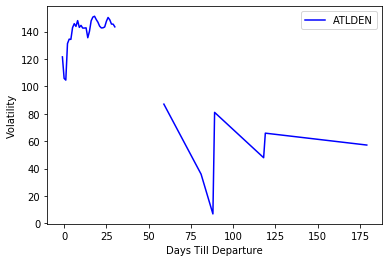

In [36]:
import matplotlib.pyplot as plt

x=np.linspace(0,152,153)
l1 = ATLDEN_UA['FARE']
plt.plot(l1,color = 'blue',label="ATLDEN")
plt.xlabel("Days Till Departure")
plt.ylabel("Volatility")
plt.legend(loc = "best")
plt.show()

DFWORD

In [37]:
DFWORD_UA=Short[Short['MARKET']=="DFWORD"]
DFWORD_UA=DFWORD_UA.groupby(["DaysTillDeparture"]).std()
DFWORD_UA

QL2_QTS   QL2_DDATE  DEPARTURE_STOPS        FARE  \
DaysTillDeparture                                                        
-1                  59.954593   59.954593              0.0  117.872014   
 0                  74.572573   74.572573              0.0   97.868479   
 1                  73.974683   73.974683              0.0   90.837480   
 2                  73.761917   73.761917              0.0  101.023571   
 3                  73.943321   73.943321              0.0  100.130630   
 4                  74.027773   74.027773              0.0  101.617587   
 5                  73.937256   73.937256              0.0  104.065607   
 6                  69.657523   69.657523              0.0  105.138300   
 7                  69.292133   69.292133              0.0  101.398900   
 8                  69.142530   69.142530              0.0  101.185506   
 9                  68.811479   68.811479              0.0   97.363589   
 10                 68.563762   68.563762              0.0   95.552802   
 11                 67.891404   67.891404              0.0   96.505919   
 12                 67.341364   67.341364              0.0   99.626508   
 13                 68.593332   68.593332              0.0  101.839370   
 14                 53.186449   53.186449              0.0  100.303222   
 15                 53.124460   53.124460              0.0  100.814985   
 16                 53.085989   53.085989              0.0   99.179821   
 17                 53.166529   53.166529              0.0   96.258910   
 18                 53.061408   53.061408              0.0   97.774996   
 19                 53.328548   53.328548              0.0  100.566019   
 20                 68.767667   68.767667              0.0  104.013688   
 21                 53.643840   53.643840              0.0  106.064669   
 22                 53.527910   53.527910              0.0  108.110927   
 23                 53.427951   53.427951              0.0  105.606266   
 24                 53.404472   53.404472              0.0  105.425479   
 25                 53.383974   53.383974              0.0  105.373413   
 26                 53.196832   53.196832              0.0  104.717347   
 27                 53.232930   53.232930              0.0  103.297598   
 28                 53.489062   53.489062              0.0  102.510550   
 29                 67.674580   67.674580              0.0  104.627980   
 30                 53.450606   53.450606              0.0  105.209159   
 31                 58.066493   58.066493              0.0   86.355327   
 32                 56.183144   56.183144              0.0   63.516186   
 33                 65.095119   65.095119              0.0   73.913754   
 34                 62.975784   62.975784              0.0   50.523643   
 35                 58.594585   58.594585              0.0   73.711072   
 36                 65.609026   65.609026              0.0   95.795985   
 37                 71.395647   71.395647              0.0   58.542324   
 38                 64.107493   64.107493              0.0   77.619878   
 39                 64.682461   64.682461              0.0   66.063908   
 40                 77.347320   77.347320              0.0   63.892687   
 41                 70.865206   70.865206              0.0   67.201777   
 42                 66.220966   66.220966              0.0   90.952979   
 43                 93.959875   93.959875              0.0   89.162196   
 44                 62.108868   62.108868              0.0   90.098134   
 45                 72.844647   72.844647              0.0   98.460056   
 46                 74.342001   74.342001              0.0   78.261611   
 47                 83.122630   83.122630              0.0   97.803212   
 48                 80.413772   80.413772              0.0   76.341615   
 49                 75.895444   75.895444              0.0   96.891746   
 50                 35.888554   35.888554              0.0   83.778593   
 51                 94.500

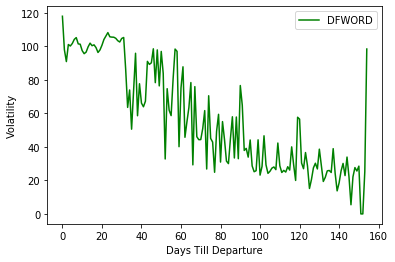

<Figure size 432x288 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt

x=np.linspace(0,154,155)
l2 = DFWORD_UA['FARE']
plt.plot(x,l2,color = 'green',label="DFWORD")
plt.xlabel("Days Till Departure")
plt.ylabel("Volatility")
plt.legend(loc = "best")
plt.show()
plt.savefig('DFWORD_UA')

EWRIAH

In [42]:
UA_EWRIAH=Short[Short['MARKET']=="IAHEWR"]
UA_EWRIAH=UA_EWRIAH.groupby(["DaysTillDeparture"]).std()
UA_EWRIAH

QL2_QTS  QL2_DDATE  DEPARTURE_STOPS        FARE  \
DaysTillDeparture                                                      
-1                 46.467518  46.467518              0.0  168.744505   
 0                 48.115346  48.115346              0.0  126.577719   
 1                 49.399598  49.399598              0.0  102.643048   
 2                 59.154849  59.154849              0.0  124.057691   
 3                 58.736556  58.736556              0.0  126.877212   
 4                 61.425265  61.425265              0.0  114.127598   
 5                 61.529499  61.529499              0.0  113.436589   
 6                 62.284093  62.284093              0.0  109.052050   
 7                 61.033091  61.033091              0.0  110.069937   
 8                 60.013449  60.013449              0.0  109.643981   
 9                 59.097312  59.097312              0.0  107.456378   
 10                57.832816  57.832816              0.0  100.559046   
 11                57.025099  57.025099              0.0   98.049546   
 12                55.815694  55.815694              0.0   97.756180   
 13                55.745837  55.745837              0.0   96.377640   
 14                55.578661  55.578661              0.0   99.799962   
 15                54.806887  54.806887              0.0  102.359844   
 16                55.393862  55.393862              0.0  100.065967   
 17                55.461187  55.461187              0.0  100.342753   
 18                55.424772  55.424772              0.0   98.536291   
 19                56.307417  56.307417              0.0   96.212076   
 20                57.229701  57.229701              0.0   94.619527   
 21                56.938981  56.938981              0.0   96.354731   
 22                56.823344  56.823344              0.0   95.452606   
 23                57.549642  57.549642              0.0   95.581428   
 24                57.380305  57.380305              0.0   95.191725   
 25                57.658110  57.658110              0.0   96.928301   
 26                58.663660  58.663660              0.0   97.797980   
 27                58.495885  58.495885              0.0   98.446777   
 28                58.380808  58.380808              0.0   99.299461   
 29                59.130601  59.130601              0.0  103.145941   
 30                59.397032  59.397032              0.0  107.111082   
 32                 0.000000   0.000000              0.0    0.000000   
 33                 0.000000   0.000000              0.0    0.000000   
 34                 0.000000   0.000000              0.0   42.146570   
 35                 0.500000   0.500000              0.0   51.142774   
 41                 0.000000   0.000000              0.0    0.000000   
 42                 0.000000   0.000000              0.0    0.000000   
 45                      NaN        NaN              NaN         NaN   
 48                      NaN        NaN              NaN         NaN   
 49                 0.500000   0.500000              0.0   13.500000   
 50                 0.547723   0.547723              0.0   12.074767   
 51                 0.577350   0.577350              0.0    0.000000   
 52                 0.500000   0.500000              0.0   15.588457   
 53                 0.547723   0.547723              0.0   42.489607   
 54                 0.547723   0.547723              0.0   40.960957   
 55                 0.547723   0.547723              0.0   65.954530   
 56                 0.547723   0.547723              0.0   91.969560   
 57                 0.000000   0.000000              0.0    0.000000   
 62                      NaN        NaN              NaN         NaN   
 66                 0.000000   0.000000              0.0   38.897944   
 67                 0.000000   0.000000              0.0   31.819805   
 68                 0.000000   0.000000              0.0   42.419336   
 82                      NaN        NaN              NaN     

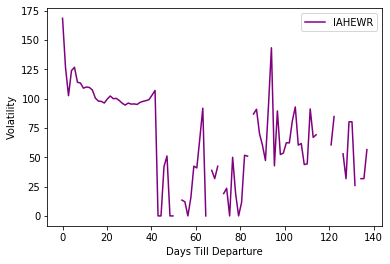

<Figure size 432x288 with 0 Axes>

In [44]:
import matplotlib.pyplot as plt

x=np.linspace(0,137,103)
l2 = UA_EWRIAH['FARE']
plt.plot(x,l2,color = 'purple',label="IAHEWR")
plt.xlabel("Days Till Departure")
plt.ylabel("Volatility")
plt.legend(loc = "best")
plt.show()
plt.savefig('UA_EWRIAH')

IAHORD

In [56]:
UA_ORDDFW=Short[Short['MARKET']=="ORDDFW"]
UA_ORDDFW=UA_ORDDFW.groupby(["DaysTillDeparture"]).std()
UA_ORDDFW

QL2_QTS   QL2_DDATE  DEPARTURE_STOPS        FARE  \
DaysTillDeparture                                                        
-1                  60.840191   60.840191              0.0  108.928949   
 0                  65.751762   65.751762              0.0   97.369076   
 1                  64.959832   64.959832              0.0   93.659885   
 2                  64.692020   64.692020              0.0  102.466553   
 3                  64.859918   64.859918              0.0  102.537894   
 4                  64.924302   64.924302              0.0  101.624138   
 5                  64.909184   64.909184              0.0  102.438534   
 6                  62.763136   62.763136              0.0  108.757070   
 7                  62.526032   62.526032              0.0  107.403231   
 8                  62.364711   62.364711              0.0  104.040198   
 9                  62.433965   62.433965              0.0  101.584860   
 10                 62.230207   62.230207              0.0   99.654852   
 11                 61.881777   61.881777              0.0   98.775601   
 12                 61.389734   61.389734              0.0  103.209382   
 13                 61.875170   61.875170              0.0  108.988069   
 14                 53.384352   53.384352              0.0  111.612892   
 15                 53.295048   53.295048              0.0  116.418109   
 16                 53.390620   53.390620              0.0  118.471279   
 17                 53.380850   53.380850              0.0  117.490045   
 18                 53.408846   53.408846              0.0  119.694084   
 19                 53.499117   53.499117              0.0  122.968602   
 20                 62.180054   62.180054              0.0  123.871396   
 21                 54.473733   54.473733              0.0  119.506883   
 22                 53.660050   53.660050              0.0  114.962431   
 23                 53.675448   53.675448              0.0  109.079165   
 24                 53.758230   53.758230              0.0  108.126467   
 25                 53.607338   53.607338              0.0  107.816533   
 26                 53.418191   53.418191              0.0  107.616349   
 27                 53.540633   53.540633              0.0  109.910353   
 28                 53.660689   53.660689              0.0  109.018679   
 29                 61.373702   61.373702              0.0  109.590693   
 30                 53.821828   53.821828              0.0  109.589487   
 31                 49.364949   49.364949              0.0   92.530211   
 32                 47.099029   47.099029              0.0   99.837217   
 33                 57.266399   57.266399              0.0   71.497767   
 34                 54.808132   54.808132              0.0   48.197572   
 35                 55.557334   55.557334              0.0   70.623727   
 36                 94.863031   94.863031              0.0   59.284211   
 37                 63.198206   63.198206              0.0   73.294060   
 38                 56.554535   56.554535              0.0   84.945289   
 39                 98.399675   98.399675              0.0   79.374016   
 40                 64.585902   64.585902              0.0   78.592942   
 41                 60.073615   60.073615              0.0   61.031326   
 42                 60.999700   60.999700              0.0   91.437316   
 43                 84.946306   84.946306              0.0   73.946459   
 44                 90.873599   90.873599              0.0  120.127768   
 45                 61.605503   61.605503              0.0  103.941531   
 46                 60.915439   60.915439              0.0  116.790375   
 47                 69.048754   69.048754              0.0   82.112831   
 48                 66.112201   66.112201              0.0   59.887750   
 49                 52.957472   52.957472              0.0   86.953245   
 50                 56.954258   56.954258              0.0   69.665970   
 51                 75.508

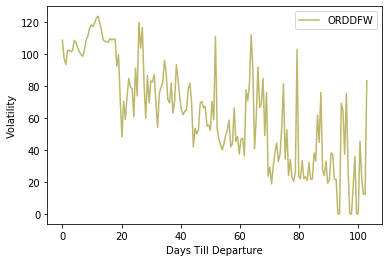

<Figure size 432x288 with 0 Axes>

In [58]:
import matplotlib.pyplot as plt

x=np.linspace(0,103,180)
l2 = UA_ORDDFW['FARE']
plt.plot(x,l2,color = 'DarkKhaki',label="ORDDFW")
plt.xlabel("Days Till Departure")
plt.ylabel("Volatility")
plt.legend(loc = "best")
plt.show()
plt.savefig('UA_IAHEWR')

IAHORD

In [45]:
UA_IAHORD=Short[Short['MARKET']=="IAHORD"]
UA_IAHORD=UA_IAHORD.groupby(["DaysTillDeparture"]).std()
UA_IAHORD

QL2_QTS   QL2_DDATE  DEPARTURE_STOPS        FARE  \
DaysTillDeparture                                                        
-1                  63.776774   63.776774              0.0  131.609798   
 0                  85.772848   85.772848              0.0  113.754361   
 1                  84.755443   84.755443              0.0  114.076691   
 2                  84.855219   84.855219              0.0  133.840261   
 3                  85.210917   85.210917              0.0  132.113027   
 4                  85.691031   85.691031              0.0  129.245476   
 5                  85.216804   85.216804              0.0  132.579785   
 6                  71.742041   71.742041              0.0  138.259863   
 7                  70.840555   70.840555              0.0  136.064997   
 8                  70.636736   70.636736              0.0  131.027702   
 9                  70.308729   70.308729              0.0  130.617664   
 10                 70.202730   70.202730              0.0  128.922578   
 11                 69.420229   69.420229              0.0  122.928610   
 12                 67.355825   67.355825              0.0  122.702414   
 13                 71.289595   71.289595              0.0  125.033950   
 14                 54.131441   54.131441              0.0  125.022235   
 15                 54.321853   54.321853              0.0  122.067824   
 16                 54.480523   54.480523              0.0  116.650263   
 17                 54.641165   54.641165              0.0  116.130292   
 18                 54.564828   54.564828              0.0  114.527982   
 19                 55.286542   55.286542              0.0  115.731357   
 20                 72.085889   72.085889              0.0  115.961463   
 21                 55.362492   55.362492              0.0  115.980096   
 22                 55.200637   55.200637              0.0  113.981690   
 23                 55.178939   55.178939              0.0  110.469777   
 24                 55.099928   55.099928              0.0  110.913671   
 25                 55.062734   55.062734              0.0  112.896799   
 26                 55.020741   55.020741              0.0  114.714164   
 27                 54.850310   54.850310              0.0  116.772917   
 28                 55.159488   55.159488              0.0  113.805221   
 29                 70.866667   70.866667              0.0  110.405226   
 30                 54.718517   54.718517              0.0  109.660310   
 31                102.919364  102.919364              0.0   92.022152   
 32                110.092828  110.092828              0.0   64.627855   
 33                114.924660  114.924660              0.0   67.283954   
 34                114.353105  114.353105              0.0   65.855997   
 35                112.263548  112.263548              0.0   62.451943   
 36                118.857953  118.857953              0.0   46.812741   
 37                117.985784  117.985784              0.0  131.430553   
 38                114.343004  114.343004              0.0   88.416632   
 39                122.835917  122.835917              0.0  128.229916   
 40                120.061464  120.061464              0.0  123.768594   
 41                118.479053  118.479053              0.0   57.154026   
 42                117.406591  117.406591              0.0   40.198324   
 43                120.565040  120.565040              0.0   52.727960   
 44                 82.567502   82.567502              0.0  123.907694   
 45                117.619489  117.619489              0.0   90.909759   
 46                123.954626  123.954626              0.0  151.242876   
 47                 85.950650   85.950650              0.0   89.059286   
 48                116.089679  116.089679              0.0   71.950657   
 49                 95.485416   95.485416              0.0   54.661951   
 50                104.873800  104.873800              0.0   55.386767   
 51                106.897

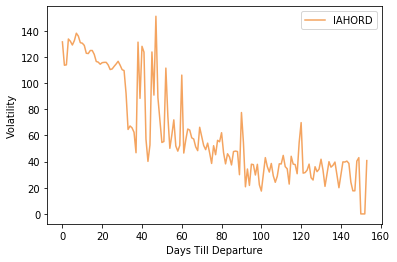

<Figure size 432x288 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt

x=np.linspace(0,153,154)
l2 = UA_IAHORD['FARE']
plt.plot(x,l2,color = 'SandyBrown',label="IAHORD")
plt.xlabel("Days Till Departure")
plt.ylabel("Volatility")
plt.legend(loc = "best")
plt.show()
plt.savefig('UA_IAHORD')

# Mid Haul

In [59]:
a

MARKET SITE CXR                 QTS  QL2_QTS DEPARTURE_DATE  QL2_DDATE  \
0     IAHORD  EXP  UA 2021-12-01 04:21:00     7274     2021-12-26       7299   
1     ORDDFW  EXP  UA 2021-12-01 04:21:00     7274     2021-12-13       7286   
2     ORDDFW  EXP  AA 2021-12-01 04:21:00     7274     2021-12-13       7286   
3     IAHORD  EXP  AA 2021-12-01 04:21:00     7274     2021-12-28       7301   
4     IAHORD  EXP  UA 2021-12-01 04:21:00     7274     2021-12-28       7301   
...      ...  ...  ..                 ...      ...            ...        ...   
2879  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-09-07       7189   
2880  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-08-27       7178   
2881  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-08-28       7179   
2882  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-08-28       7179   
2883  JFKSFO  EXP  DL 2021-08-03 09:17:00     7154     2021-10-15       7227   

      DEPARTURE_STOPS FARE_TYPE    FARE  ...    YEAR_MONTH DURATION_FLIGHT  \
0                   0   ECONOMY  268.40  ...  IAHORD202112            2:40   
1                   0   ECONOMY  318.40  ...  ORDDFW202112            2:54   
2                   0   ECONOMY  460.40  ...  ORDDFW202112            2:34   
3                   0   ECONOMY  128.40  ...  IAHORD202112            2:42   
4                   0   ECONOMY  167.41  ...  IAHORD202112            2:37   
...               ...       ...     ...  ...           ...             ...   
2879                0   ECONOMY  329.21  ...   JFKSFO20219            6:33   
2880                0   ECONOMY  272.40  ...   JFKSFO20218             7:1   
2881                0   ECONOMY  238.67  ...   JFKSFO20218             7:1   
2882                0   ECONOMY  238.67  ...   JFKSFO20218            6:57   
2883                0   ECONOMY  198.40  ...  JFKSFO202110            6:44   

     MONTH  YEAR DURATION_HRSINT  HAUL_TYPE      tDATE                tqts  \
0       12  2021             3.0      short 2021-12-26 2021-12-01 04:21:00   
1       12  2021             3.0      short 2021-12-13 2021-12-01 04:21:00   
2       12  2021             3.0      short 2021-12-13 2021-12-01 04:21:00   
3       12  2021             3.0      short 2021-12-28 2021-12-01 04:21:00   
4       12  2021             3.0      short 2021-12-28 2021-12-01 04:21:00   
...    ...   ...             ...        ...        ...                 ...   
2879     8  2021             7.0       long 2021-09-07 2021-08-03 09:17:00   
2880     8  2021             7.0       long 2021-08-27 2021-08-03 09:17:00   
2881     8  2021             7.0       long 2021-08-28 2021-08-03 09:17:00   
2882     8  2021             7.0       long 2021-08-28 2021-08-03 09:17:00   
2883     8  2021             7.0       long 2021-10-15 2021-08-03 09:17:00   

                   re DaysTillDeparture  
0    24 days 19:39:00                24  
1    11 days 19:39:00                11  
2    11 days 19:39:00                11  
3    26 days 19:39:00                26  
4    26 days 19:39:00                26  
...               ...               ...  
2879 34 days 14:43:00                34  
2880 23 days 14:43:00                23  
2881 24 days 14:43:00                24  
2882 24 days 14:43:00                24  
2883 72 days 14:43:00                72  

[10906761 rows x 23 columns]

In [ ]:
a.HAUL_TYPE

In [67]:
Mid=a[a['HAUL_TYPE']=='medium']
Mid

MARKET SITE CXR                 QTS  QL2_QTS DEPARTURE_DATE  QL2_DDATE  \
0      LAXHNL  EXP  DL 2021-08-17 09:31:00     7168     2021-12-15       7288   
1      LAXHNL  EXP  DL 2021-08-17 09:31:00     7168     2021-11-19       7262   
2      LAXHNL  EXP  DL 2021-08-17 09:31:00     7168     2021-09-17       7199   
3      LAXHNL  EXP  DL 2021-08-17 09:31:00     7168     2021-11-30       7273   
4      LAXHNL  EXP  DL 2021-08-17 09:31:00     7168     2021-11-30       7273   
...       ...  ...  ..                 ...      ...            ...        ...   
10138  ATLDEN  EXP  UA 2022-03-14 14:09:00     7377     2022-03-18       7381   
10139  EWRIAH  EXP  UA 2021-12-13 06:13:00     7286     2021-12-28       7301   
10140  ATLDEN  EXP  UA 2022-01-23 20:30:00     7327     2022-01-27       7331   
10141  ATLDEN  EXP  UA 2021-12-23 23:09:00     7296     2022-01-01       7305   
10142  ATLDEN  EXP  UA 2022-01-23 20:30:00     7327     2022-01-27       7331   

       DEPARTURE_STOPS FARE_TYPE    FARE  ...    YEAR_MONTH DURATION_FLIGHT  \
0                    0   ECONOMY  579.00  ...  LAXHNL202112            5:45   
1                    0   ECONOMY  609.05  ...  LAXHNL202111            5:45   
2                    0   ECONOMY  169.36  ...   LAXHNL20219            5:45   
3                    0   ECONOMY  459.00  ...  LAXHNL202111            5:45   
4                    0   ECONOMY  279.72  ...  LAXHNL202111            5:45   
...                ...       ...     ...  ...           ...             ...   
10138                0   ECONOMY  228.60  ...   ATLDEN20223            3:32   
10139                0   ECONOMY  328.40  ...  EWRIAH202112            4:13   
10140                0   ECONOMY  123.61  ...   ATLDEN20221            3:44   
10141                0   ECONOMY  291.40  ...   ATLDEN20221            3:31   
10142                0   ECONOMY  123.61  ...   ATLDEN20221            3:30   

      MONTH  YEAR DURATION_HRSINT  HAUL_TYPE      tDATE                tqts  \
0         8  2021             6.0     medium 2021-12-15 2021-08-17 09:31:00   
1         8  2021             6.0     medium 2021-11-19 2021-08-17 09:31:00   
2         8  2021             6.0     medium 2021-09-17 2021-08-17 09:31:00   
3         8  2021             6.0     medium 2021-11-30 2021-08-17 09:31:00   
4         8  2021             6.0     medium 2021-11-30 2021-08-17 09:31:00   
...     ...   ...             ...        ...        ...                 ...   
10138     3  2022             4.0     medium 2022-03-18 2022-03-14 14:09:00   
10139    12  2021             4.0     medium 2021-12-28 2021-12-13 06:13:00   
10140     1  2022             4.0     medium 2022-01-27 2022-01-23 20:30:00   
10141    12  2021             4.0     medium 2022-01-01 2021-12-23 23:09:00   
10142     1  2022             4.0     medium 2022-01-27 2022-01-23 20:30:00   

                     re DaysTillDeparture  
0     119 days 14:29:00               119  
1      93 days 14:29:00                93  
2      30 days 14:29:00                30  
3     104 days 14:29:00               104  
4     104 days 14:29:00               104  
...                 ...               ...  
10138   3 days 09:51:00                 3  
10139  14 days 17:47:00                14  
10140   3 days 03:30:00                 3  
10141   8 days 00:51:00                 8  
10142   3 days 03:30:00                 3  

[1229501 rows x 23 columns]

In [64]:
Mid=Mid.groupby(["DaysTillDeparture","CXR","MARKET"]).agg([np.mean,np.std])
Mid

QL2_QTS                QL2_DDATE  \
                                     mean         std         mean   
DaysTillDeparture CXR MARKET                                         
0                 AA  LAXHNL  7244.539130  119.449193  7245.117391   
                  DL  ATLDEN  7326.362947   13.624552  7327.079090   
                      LAXHNL  7296.328205  114.021182  7297.087179   
                  UA  ATLDEN  7321.487622   46.927800  7322.179147   
                      EWRIAH  7330.464364   62.764863  7331.164250   
                      IAHEWR  7364.433145   44.331641  7365.120466   
                      LAXHNL  7275.269962  128.130567  7276.007605   
1                 AA  LAXHNL  7251.260870  134.214841  7253.260870   
                  DL  ATLDEN  7325.846678   14.584121  7327.846678   
                      LAXHNL  7237.075472  116.280306  7239.075472   
                  UA  ATLDEN  7318.979373   49.695078  7320.979373   
                      EWRIAH  7327.647516   66.284989  7329.647516   
                      IAHEWR  7367.163179   43.286142  7369.163179   
                      LAXHNL  7221.253521  136.131315  7223.253521   
2                 AA  LAXHNL  7255.091912  123.524662  7258.091912   
                  DL  ATLDEN  7327.162722   16.522986  7330.162722   
                      LAXHNL  7305.923858   90.024482  7308.923858   
                  UA  ATLDEN  7319.199638   43.327687  7322.199638   
                      EWRIAH  7315.923457   80.098977  7318.923457   
                      IAHEWR  7376.671561   45.204416  7379.671561   
                      LAXHNL  7285.769663  117.635114  7288.769663   
3                 AA  LAXHNL  7151.311111  133.820406  7155.311111   
                  DL  ATLDEN  7326.416230   15.741249  7330.416230   
                      LAXHNL  7149.827586   60.141541  7153.827586   
                  UA  ATLDEN  7318.207563   42.799135  7322.207563   
                      EWRIAH  7315.835397   79.636524  7319.835397   
                      IAHEWR  7374.701890   45.153644  7378.701890   
                      LAXHNL  7134.024390  127.303474  7138.024390   
4                 AA  LAXHNL  7172.342857   90.058459  7177.342857   
                  DL  ATLDEN  7326.338753   16.989659  7331.338753   
                      LAXHNL  7329.585366  115.881373  7334.585366   
                  UA  ATLDEN  7318.343520   41.838950  7323.343520   
                      EWRIAH  7317.314934   80.514809  7322.314934   
                      IAHEWR  7378.693766   42.207450  7383.693766   
                      LAXHNL  7345.603448  108.481205  7350.603448   
5                 AA  LAXHNL  7140.707317  109.996874  7146.707317   
                  DL  ATLDEN  7324.979434   16.831015  7330.979434   
                      LAXHNL  7145.571429   47.876478  7151.571429   
                  UA  ATLDEN  7317.749217   41.005508  7323.749217   
                      EWRIAH  7316.492369   79.953647  7322.492369   
                      IAHEWR  7376.174024   43.299231  7382.174024   
                      LAXHNL  7161.128205  129.387053  7167.128205   
6                 AA  LAXHNL  7171.528444  135.438589  7178.528444   
                  DL  ATLDEN  7322.666667   15.547334  7329.666667   
                      LAXHNL  7231.726027  124.238759  7238.726027   
                  UA  ATLDEN  7317.361499   40.510449  7324.361499   
                      EWRIAH  7318.208436   81.856733  7325.208436   
                      IAHEWR  7376.850222   42.941713  7383.850222   
                      LAXHNL  7201.064655  151.141204  7208.064655   
7                 AA  LAXHNL  7158.443950  137.712015  7166.443950   
                  DL  ATLDEN  7322.053333   15.766017  7330.053333   
                      LAXHNL  7195.176015  124.702087  7203.176015   
                  UA  ATLDEN  7316.172256   40.717080  7324.172256   
                      EWRIAH  7317.402268   80.424512  7325.402268   
                      IAHEWR  7376.319355   

In [65]:
Mid.head()

QL2_QTS                QL2_DDATE  \
                                     mean         std         mean   
DaysTillDeparture CXR MARKET                                         
0                 AA  LAXHNL  7244.539130  119.449193  7245.117391   
                  DL  ATLDEN  7326.362947   13.624552  7327.079090   
                      LAXHNL  7296.328205  114.021182  7297.087179   
                  UA  ATLDEN  7321.487622   46.927800  7322.179147   
                      EWRIAH  7330.464364   62.764863  7331.164250   

                                         DEPARTURE_STOPS             FARE  \
                                     std            mean  std        mean   
DaysTillDeparture CXR MARKET                                                
0                 AA  LAXHNL  119.445769               0  0.0  209.164348   
                  DL  ATLDEN   13.651982               0  0.0  325.139307   
                      LAXHNL  114.170236               0  0.0  358.359487   
                  UA  ATLDEN   46.915677               0  0.0  350.905457   
                      EWRIAH   62.756691               0  0.0  349.445503   

                                             MONTH                   YEAR  \
                                     std      mean       std         mean   
DaysTillDeparture CXR MARKET                                                
0                 AA  LAXHNL  117.626739  7.078261  4.202615  2021.286957   
                  DL  ATLDEN   72.516105  1.158180  0.445398  2022.000000   
                      LAXHNL  161.358977  6.015385  3.328225  2021.517949   
                  UA  ATLDEN  116.847902  4.863071  4.620490  2021.683616   
                      EWRIAH  149.204409  5.176381  4.204105  2021.681594   

                                       DURATION_HRSINT       
                                   std            mean  std  
DaysTillDeparture CXR MARKET                                 
0                 AA  LAXHNL  0.557054             6.0  0.0  
                  DL  ATLDEN  0.000000             4.0  0.0  
                      LAXHNL  0.521137             6.0  0.0  
                  UA  ATLDEN  0.468171             4.0  0.0  
                      EWRIAH  0.471023             4.0  0.0

ATLDEN

In [68]:
ATLDEN=Mid[Mid['MARKET']=="ATLDEN"]
ATLDEN=ATLDEN.groupby(["DaysTillDeparture"]).std()
ATLDEN

QL2_QTS  QL2_DDATE  DEPARTURE_STOPS        FARE  \
DaysTillDeparture                                                      
0                  45.049140  45.038534              0.0  113.922708   
1                  47.958816  47.958816              0.0  124.476625   
2                  42.519019  42.519019              0.0  158.319183   
3                  41.867142  41.867142              0.0  153.168002   
4                  40.983915  40.983915              0.0  147.030664   
5                  40.132940  40.132940              0.0  153.289394   
6                  39.397029  39.397029              0.0  153.117670   
7                  39.679036  39.679036              0.0  153.037593   
8                  38.995116  38.995116              0.0  162.389759   
9                  37.482090  37.482090              0.0  155.858493   
10                 36.565866  36.565866              0.0  157.287601   
11                 35.994793  35.994793              0.0  159.158341   
12                 35.988136  35.988136              0.0  159.917888   
13                 36.863348  36.863348              0.0  162.405774   
14                 33.126901  33.126901              0.0  161.259400   
15                 32.895277  32.895277              0.0  156.197706   
16                 32.408565  32.408565              0.0  158.447439   
17                 32.290396  32.290396              0.0  155.783575   
18                 32.397379  32.397379              0.0  153.890832   
19                 33.437097  33.437097              0.0  156.421451   
20                 39.137838  39.137838              0.0  147.993833   
21                 34.255248  34.255248              0.0  147.658322   
22                 34.340196  34.340196              0.0  150.407943   
23                 33.810974  33.810974              0.0  145.788353   
24                 33.386163  33.386163              0.0  143.394496   
25                 33.189541  33.189541              0.0  140.491854   
26                 32.858422  32.858422              0.0  138.356902   
27                 32.615319  32.615319              0.0  137.116968   
28                 32.602116  32.602116              0.0  137.796704   
29                 37.397670  37.397670              0.0  136.732754   
30                 32.186710  32.186710              0.0  136.257007   
44                 37.441764  37.441764              0.0   84.654427   
59                 11.536897  11.536897              0.0   73.278385   
89                 26.919633  26.919633              0.0   43.132974   
118                 0.000000   0.000000              0.0   38.176695   
119                24.239774  24.239774              0.0   34.835734   
179                 1.204388   1.204388              0.0  105.718369   

                      MONTH      YEAR  DURATION_HRSINT  
DaysTillDeparture                                       
0                  4.539046  0.456201              0.0  
1                  4.613696  0.464870              0.0  
2                  4.694731  0.475224              0.0  
3                  4.709218  0.476150              0.0  
4                  4.722901  0.476033              0.0  
5                  4.760113  0.478245              0.0  
6                  4.780973  0.479099              0.0  
7                  4.815924  0.482316              0.0  
8                  4.854102  0.484547              0.0  
9                  4.881045  0.484936              0.0  
10                 4.929717  0.488142              0.0  
11                 4.967549  0.490514              0.0  
12                 4.992610  0.492380              0.0  
13                 5.022366  0.495449              0.0  
14                 5.048304  0.495724              0.0  
15                 5.057087  0.496712              0.0  
16                 5.083842  0.498141              0.0  
17                 5.092762  0.499095              0.0  
18                 5.094248  0.499378              0.0  
19             

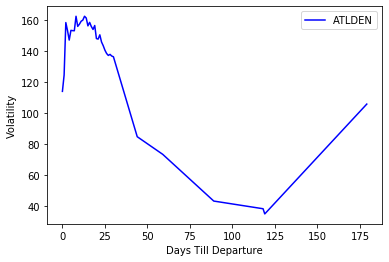

In [69]:
import matplotlib.pyplot as plt

x=np.linspace(0,152,153)
l1 = ATLDEN['FARE']
plt.plot(l1,color = 'blue',label="ATLDEN")
plt.xlabel("Days Till Departure")
plt.ylabel("Volatility")
plt.legend(loc = "best")
plt.show()

In [70]:
LAXHNL=Mid[Mid['MARKET']=="LAXHNL"]
LAXHNL=LAXHNL.groupby(["DaysTillDeparture"]).std()
LAXHNL

QL2_QTS   QL2_DDATE  DEPARTURE_STOPS        FARE  \
DaysTillDeparture                                                        
0                  122.930373  123.050666              0.0  149.410383   
1                  130.752607  130.752607              0.0  111.643075   
2                  115.270826  115.270826              0.0  121.331046   
3                  116.410952  116.410952              0.0  127.483624   
4                  123.785778  123.785778              0.0  113.912485   
5                  108.385431  108.385431              0.0   86.764228   
6                  140.962928  140.962928              0.0  123.992796   
7                  140.461392  140.461392              0.0  137.705618   
8                  141.966804  141.966804              0.0  144.815412   
9                  147.555010  147.555010              0.0  151.252216   
10                 141.285700  141.285700              0.0  150.032578   
11                 141.832805  141.832805              0.0  140.942111   
12                 142.831983  142.831983              0.0  129.531389   
13                 147.246025  147.246025              0.0  142.640302   
14                 151.501788  151.501788              0.0  150.347146   
15                 146.429624  146.429624              0.0  157.070665   
16                 148.401903  148.401903              0.0  164.232082   
17                 151.857746  151.857746              0.0  160.764685   
18                 147.759623  147.759623              0.0  153.795726   
19                 153.474902  153.474902              0.0  141.750161   
20                 152.067862  152.067862              0.0  156.625886   
21                 148.511554  148.511554              0.0  173.873518   
22                 149.794899  149.794899              0.0  168.308422   
23                 154.636874  154.636874              0.0  171.817192   
24                 150.274951  150.274951              0.0  165.841986   
25                 149.875158  149.875158              0.0  162.696260   
26                 150.094661  150.094661              0.0  153.600151   
27                 156.070386  156.070386              0.0  159.449245   
28                 151.414573  151.414573              0.0  171.816357   
29                 150.448765  150.448765              0.0  164.235667   
30                 151.903940  151.903940              0.0  164.081971   
31                 151.331056  151.331056              0.0  168.935682   
32                 151.118256  151.118256              0.0  169.574091   
33                 151.135291  151.135291              0.0  158.828254   
34                 151.560146  151.560146              0.0  158.472907   
35                 152.545775  152.545775              0.0  167.905462   
36                 153.485965  153.485965              0.0  163.617669   
37                 153.247671  153.247671              0.0  158.786016   
38                 153.033579  153.033579              0.0  156.642419   
39                 154.274296  154.274296              0.0  155.592272   
40                 154.018435  154.018435              0.0  152.881622   
41                 153.503068  153.503068              0.0  161.864980   
42                 153.704249  153.704249              0.0  167.391579   
43                 153.386543  153.386543              0.0  163.518930   
44                 153.090207  153.090207              0.0  166.470620   
45                 153.797866  153.797866              0.0  172.686626   
46                 154.575886  154.575886              0.0  171.448125   
47                 153.646594  153.646594              0.0  160.570839   
48                 154.702225  154.702225              0.0  164.198392   
49                 154.857625  154.857625              0.0  172.726238   
50                 154.546857  154.546857              0.0  172.975726   
51                 154.671056  154.671056              0.0  170.318303   
52                 154.778

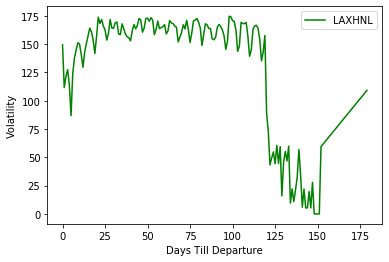

In [72]:
import matplotlib.pyplot as plt

x=np.linspace(0,152,153)
l1 = LAXHNL['FARE']
plt.plot(l1,color = 'green',label="LAXHNL")
plt.xlabel("Days Till Departure")
plt.ylabel("Volatility")
plt.legend(loc = "best")
plt.show()

In [74]:
EWRIAH=Mid[Mid['MARKET']=="EWRIAH"]
EWRIAH=EWRIAH.groupby(["DaysTillDeparture"]).std()
EWRIAH

QL2_QTS   QL2_DDATE  DEPARTURE_STOPS        FARE  \
DaysTillDeparture                                                        
0                   62.764863   62.756691              0.0  149.204409   
1                   66.284989   66.284989              0.0   90.319944   
2                   80.098977   80.098977              0.0  110.308780   
3                   79.636524   79.636524              0.0  113.393885   
4                   80.514809   80.514809              0.0  117.691424   
5                   79.953647   79.953647              0.0  116.995805   
6                   81.856733   81.856733              0.0  110.704626   
7                   80.424512   80.424512              0.0  114.937212   
8                   80.600092   80.600092              0.0  112.445965   
9                   80.038668   80.038668              0.0  107.560065   
10                  78.302357   78.302357              0.0  105.711751   
11                  79.353253   79.353253              0.0  107.595652   
12                  78.428078   78.428078              0.0  109.023920   
13                  75.567294   75.567294              0.0  107.392407   
14                  58.900590   58.900590              0.0  120.002114   
15                  59.478175   59.478175              0.0  120.379905   
16                  60.240421   60.240421              0.0  116.303218   
17                  60.256468   60.256468              0.0  109.317473   
18                  60.511940   60.511940              0.0  105.651075   
19                  62.212068   62.212068              0.0  107.071847   
20                  75.024101   75.024101              0.0  111.478817   
21                  61.089774   61.089774              0.0  115.875319   
22                  60.949283   60.949283              0.0  106.703102   
23                  61.577663   61.577663              0.0  103.134403   
24                  61.611630   61.611630              0.0  104.252879   
25                  62.057451   62.057451              0.0  105.220235   
26                  61.953051   61.953051              0.0  103.575756   
27                  61.898353   61.898353              0.0  103.598438   
28                  63.907947   63.907947              0.0  104.214579   
29                  77.218189   77.218189              0.0  105.314859   
30                  62.279711   62.279711              0.0  101.246482   
31                   6.653007    6.653007              0.0   59.727833   
32                   6.086676    6.086676              0.0   75.301223   
33                   6.235572    6.235572              0.0  109.889429   
34                   6.676184    6.676184              0.0   53.523429   
35                   0.377964    0.377964              0.0   35.620353   
36                        NaN         NaN              NaN         NaN   
37                        NaN         NaN              NaN         NaN   
38                   6.218253    6.218253              0.0   17.173623   
39                   3.283436    3.283436              0.0   78.117311   
40                   5.150370    5.150370              0.0   67.607614   
41                   3.072650    3.072650              0.0   52.088725   
42                   0.421637    0.421637              0.0   57.193628   
43                 149.115645  149.115645              0.0   58.394173   
44                  90.855749   90.855749              0.0   91.361476   
45                   4.071261    4.071261              0.0   89.323309   
46                   0.516398    0.516398              0.0   57.140179   
47                   3.072650    3.072650              0.0   87.109085   
48                   3.072650    3.072650              0.0   82.742736   
49                   6.169328    6.169328              0.0   80.600903   
50                   0.333333    0.333333              0.0   58.661695   
51                   7.234178    7.234178              0.0   23.586719   
52                   4.898

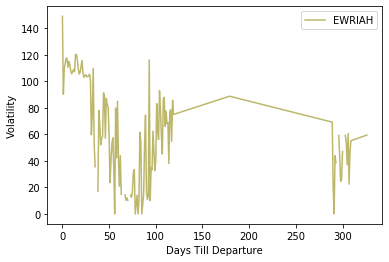

In [75]:
import matplotlib.pyplot as plt

x=np.linspace(0,152,153)
l1 = EWRIAH['FARE']
plt.plot(l1,color = 'DarkKhaki',label="EWRIAH")
plt.xlabel("Days Till Departure")
plt.ylabel("Volatility")
plt.legend(loc = "best")
plt.show()

In [ ]:
EWRIAH

In [ ]:
LAXHNL=Mid[Mid['MARKET']=="LAXHNL"]
LAXHNL=LAXHNL.groupby(["DaysTillDeparture"]).std()
LAXHNL

In [ ]:
import matplotlib.pyplot as plt

x=np.linspace(0,152,153)
l1 = LAXHNL['FARE']
plt.plot(l1,color = 'blue',label="LAXHNL")
plt.xlabel("Days Till Departure")
plt.ylabel("Volatility")
plt.legend(loc = "best")
plt.show()